### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2019 ###

# MLB Schedule #

#### Max Glickman (mglickman@wisc.edu), Kevin Reed (kreed6@wisc.edu), Sophia Stevenson (sophia.stephenson@wisc.edu), and Gangbin Lee (glee79@wisc.edu)

*****
3.A. Strict home away constraints model
### Table of Contents

1. [Introduction](#1.-Introduction)
  1. [Background](#1.A.-Background)
  1. [Key Terms](#1.B.-Key-Terms)
1. [Mathematical Model](#2.-Mathematical-Model)
  1. [Assumptions](#2.A.-Assumptions)
  1. [Model](#2.B.-Model)
1. [Solution](#3.-Solution)
  1. [Strict Model](#3.A.-Strict-Home-vs.-Away-Constraints-Model)
  1. [Loose Model](#3.B.-Loose-Home-vs.-Away-Constraints-Model)
1. [Results and Discussion](#4.-Results-and-Discussion)
  1. [Optimal Schedule](#4.A.-Optimal-Schedule)
  1. [Home Games vs. Away Games](#4.B.-Home-Games-vs.-Away-Games)
  1. [Charts](#4.C.-Charts)
1. [Conclusion](#5.-Conclusion)
1. [References](#6.-References)

## 1. Introduction ##

### 1.A. Background

Major League Baseball (MLB) puts great care into forming their season’s schedule. They have certain restrictions on divisional and conference gameplay, while also having an equal number of home and away games. They also create well-formed road trips and play 3 or 4 game series. Currently, however, the MLB does not take into account the strength of each team while forming the next season’s schedule. In our optimization problem, we try to make every team’s strength of schedule similar over the course of the season while still following our own (slightly modified) league play constraints. We are given the Relative Power Index for each team for 2018 from ESPN’s website [1]. 

The MLB is divided into two once-separate Leagues of baseball: the National League (NL) and the American League (AL). The National League began first in 1876 [2]. Their schedules consisted of playing the 7 other opponents each a total of 10 times for a total of 70 games [2]. Each team was responsible for coordinating the game times with their opponents. A league schedule wasn’t coordinated until the following year in 1877 [2]. The AL was introduced in 1901 starting with a league schedule of 140 games evenly divided between 7 opponents [2]. The AL was the first league to have a 162 game season in 1961, with the NL following close behind beginning a 162 game season the next year in 1962 [2]. In 1969, both the AL and NL introduced divisional play with regulations on intra- and inter-divisional games [2]. Although the World Series has pitted the top NL and AL teams against each other for the championship since 1903, interleague play during the regular season was not implemented until 1997 [2]. The current MLB schedule as we know it wasn’t adopted until 2013 [2].
	
For the sake of this project, we made a few simplifications to the matchup scheduling process. We are stating that 24-25 series must be played within a team’s division, 22-23 series are played within a team’s conference, but outside their division, and 6-7 series are played outside of a team’s conference. We will restrict the number of total home games to each be in between 22 and 28. For simplifying this project, we are treating each set of games as a series a 3 or 4 game series. With 59 three game series and assuming 3 of these series are 4 game series, then this will total to 162 games total. We made sure everything should fall into multiples of 3 games, which is 1 series. 



### 1.B. Key Terms

**Relative Power Index (RPI):** The RPI is a quantifiable way to rank teams based on winning percentage, opponents’ winning percentage, and opponents’ opponents’ winning percentage to provide an overall comparative ranking [1]. It is made relative to other teams where a .500 RPI is the average strength of a team, with over .500 being better than average and under .500 being worse than average.

**Strength of Schedule (SoS):** The average RPI rating for each team faced throughout the entire season.

**Home Game vs Away Game:** A home game for team A takes place in the city of team A while an away game for team A takes place in the city of the team they are playing

**Series:** A series is three games in a row including the same two teams (although every once in a while a series may be 4 games).

**Conference:** A conference represents half of all of the teams in the MLB. One conference is called the American League (AL) and the other conference is called the National League (NL)

**Division:** There are three divisions of five teams within each of the two conferences. 
The divisions are: AL East, AL Central, AL West, NL East, NL Central, NL West


## 2. Mathematical Model ##

### 2.A. Assumptions

Before creating our model, we first made some assumptions to refine and focus the results to best represent our goal for the project. These assumptions prevent the model from becoming infeasible or too complicated and are listed below:

-Each team is freely available to travel for their games

-Teams can play games in back to back days

-There won’t be any rain delays or double headers

-Teams rank stays the same as previous years

-All games between a pair of teams are played at the same stadium


### 2.B. Model


 **Model:**
 
This is a linear programming problem that focuses on schedule optimization. The solutions need to be integers 
    for each game but since it is a scheduling problem they should work out to be integers. The decisions we need 
    to make include how to value the importance of strength of schedule vs. balancing home and away games. This 
    is modeled with a tradeoff how tight the constraint of even home/away games is decided to be.
	
 **Data:**
    
The data used for this model is directly entered in the Julia code and includes all of the MLB teams and their corresponding RPIs from the previous year. We also used data about the current strength of schedule to compare to our model. The data was provided by ESPN and contains the RPI for each team during the 2018 season. The data we directly entered into Julia was from this table where we used the RPI and SOS values:

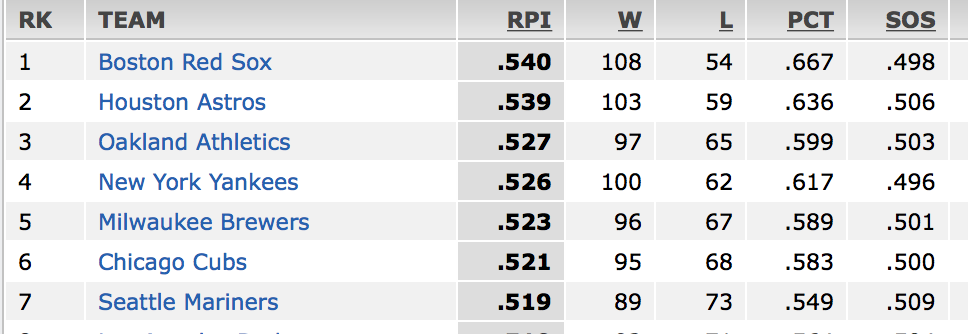

**Decision Variables:** 

The main decision variable is for each team in the league who they will play against for every 3-game series of the season. This is modeled via a 30 by 30 matrix where if Xij = 4 this means team i plays team j in 4 three-game series. This decision variable is represented by series[i,j].

Another decision variable refers to which team is home and away for every three-game series that they play. This is modeled by a binary 30 by 30 matrix where if Xij = 1 then team i plays team j at home. This variable is constrained so teams that play each other cannot both be home for their three-games series.

         A related decision variable would be the minimum number of home and away games each teams are allowed. 
         This variable is set in one of the constraints but can be changed based on the goals of the model.
     

**Constraints:**
    
Teams cannot play themselves

Each team plays teams in their division either 24 or 25 times

Each team plays teams in their conference (including their division) either 46 or 47 times

Each team plays teams out of their conference either 6 or 7 times

Each team plays a total of 53 games

In our strict model each team plays between 24 and 28 home games, in our relaxed model each team plays between 14 and 38 home games

    This constraint can be relaxed to a broader or range or tightened to a more specific range depending on the 
    goals of the model

    Making the range more broad allows for more even strength of schedules
    
    Making the range more specific creates more disperse strength of schedules
    
    In the charts below you in the review section can see how the relative fairness of strength of schedules 
    changes as you relax or tighten this constraint
    
Each team cannot have a negative number of series versus another team

If team i plays team j then if team i is home then team j is away and vice versa



**Objective Function:**
    
The objective function has the goal of minimizing the difference between each teams strength of schedule and the average strength of schedule that would occur by playing the average team every game. It does this by calculating each teams strength of schedule by multiplying the number of their games against a team by the teams RPI and summing these up. The objective function then takes the sum of the squared differences of this strength of schedule and the average schedule and minimizes this.

**LaTEX Model:**
The LaTEX model below uses the strict home/away constraints of in between 24 and 28 home games

In [27]:
using Latexify, LaTeXStrings
L"$\textit{Minimize}$ $\,\,\displaystyle \sum_{i=1}^{30}{(series[k,i]*rpi[i]}-30*0.5)^2$    $\,\,\,\,\,\,\,\,\,k = 1, 2, 3,..., 30$"


L"$\textit{Minimize}$ $\,\,\displaystyle \sum_{i=1}^{30}{(series[k,i]*rpi[i]}-30*0.5)^2$    $\,\,\,\,\,\,\,\,\,k = 1, 2, 3,..., 30$"

In [28]:
L"$ home[i,j] $ $\textit{means if i is home, then j is away} $"
L"$ series[i,j] = x $ $\textit{means team i played the team j x times} $"
L"$\textit{Subject to}$ $\\\\\,\,\,\displaystyle series[i+j,i+j] == 0$    $\,\,\,\,\,\,\,\,\,i = 1, 6, 11, 16, 21, 26, \,\,\,j = 0, 1, 2, 3, 4  
\\\\\\\\\displaystyle series[i+j,k]  <= 25    \,\,\,\,\,\,\,\,\,i = 1, 6, 11, 16, 21, 26, \,\,\,j = 0, 1, 2, 3, 4, \,\,\,k = i,i+1,...,i+4
\\\\\\\\\displaystyle \sum_{k=16}^{30}{series[i+j,k] <= 47}    \,\,\,\,\,\,\,\,\,i = 16, 21, 26, \,\,\,j = 0, 1, 2, 3, 4
\\\\\\\\\displaystyle \sum_{k=16}^{30}{series[i+j,k] >= 46}    \,\,\,\,\,\,\,\,\,i = 16, 21, 26, \,\,\,j = 0, 1, 2, 3, 4
\\\\\\\\\displaystyle \sum_{k=1}^{15}{series[i+j,k] <= 47}    \,\,\,\,\,\,\,\,\,i = 1, 6, 11, \,\,\,j = 0, 1, 2, 3, 4
\\\\\\\\\displaystyle \sum_{k=1}^{15}{series[i+j,k] >= 46}    \,\,\,\,\,\,\,\,\,i = 1, 6, 11, \,\,\,j = 0, 1, 2, 3, 4
\\\\\\\\\displaystyle \sum_{k=1}^{15}{series[i+j,k] <= 7}\,\,\,\,\,\,\,\,\,i =  16, 21, 26, \,\,\,j = 0, 1, 2, 3, 4
\\\\\\\\\displaystyle \sum_{k=1}^{15}{series[i+j,k] >= 6}\,\,\,\,\,\,\,\,\,i =  16, 21, 26, \,\,\,j = 0, 1, 2, 3, 4
\\\\\\\\\displaystyle \sum_{k=16}^{30}{series[i+j,k] <= 7}\,\,\,\,\,\,\,\,\,i = 1, 6, 11,  \,\,\,j = 0, 1, 2, 3, 4
\\\\\\\\\displaystyle \sum_{k=16}^{30}{series[i+j,k] >= 6}\,\,\,\,\,\,\,\,\,i = 1, 6, 11,  \,\,\,j = 0, 1, 2, 3, 4
\\\\\\\\\displaystyle \sum_{j=1}^{30}{series[i,j] <= 54}\,\,\,\,\,\,\,\,\,i = 1,2,3,...,30
\\\\\\\\\displaystyle \sum_{j=1}^{30}{series[i,j] >= 53}\,\,\,\,\,\,\,\,\,i = 1,2,3,...,30
\\\\\\\\\displaystyle \sum_{j=1}^{30}{home[i,j]*series[i,j] <= 28}\,\,\,\,\,\,\,\,\,i = 1,2,3,...,30
\\\\\\\\\displaystyle \sum_{j=1}^{30}{home[i,j]*series[i,j] >= 24}\,\,\,\,\,\,\,\,\,i = 1,2,3,...,30
\\\\\\\\\displaystyle home[j,i] == 1 - home[i,j]\,\,\,\,\,\,\,\,\,i = 1,2,3,...,30, \,\,\,j=1,2,3,...,30$"



L"$\textit{Subject to}$ $\\\\\,\,\,\displaystyle series[i+j,i+j] == 0$    $\,\,\,\,\,\,\,\,\,i = 1, 6, 11, 16, 21, 26, \,\,\,j = 0, 1, 2, 3, 4  
\\\\\\\\\displaystyle series[i+j,k]  <= 25    \,\,\,\,\,\,\,\,\,i = 1, 6, 11, 16, 21, 26, \,\,\,j = 0, 1, 2, 3, 4, \,\,\,k = i,i+1,...,i+4
\\\\\\\\\displaystyle \sum_{k=16}^{30}{series[i+j,k] <= 47}    \,\,\,\,\,\,\,\,\,i = 16, 21, 26, \,\,\,j = 0, 1, 2, 3, 4
\\\\\\\\\displaystyle \sum_{k=16}^{30}{series[i+j,k] >= 46}    \,\,\,\,\,\,\,\,\,i = 16, 21, 26, \,\,\,j = 0, 1, 2, 3, 4
\\\\\\\\\displaystyle \sum_{k=1}^{15}{series[i+j,k] <= 47}    \,\,\,\,\,\,\,\,\,i = 1, 6, 11, \,\,\,j = 0, 1, 2, 3, 4
\\\\\\\\\displaystyle \sum_{k=1}^{15}{series[i+j,k] >= 46}    \,\,\,\,\,\,\,\,\,i = 1, 6, 11, \,\,\,j = 0, 1, 2, 3, 4
\\\\\\\\\displaystyle \sum_{k=1}^{15}{series[i+j,k] <= 7}\,\,\,\,\,\,\,\,\,i =  16, 21, 26, \,\,\,j = 0, 1, 2, 3, 4
\\\\\\\\\displaystyle \sum_{k=1}^{15}{series[i+j,k] >= 6}\,\,\,\,\,\,\,\,\,i =  16, 21, 26, \,\,\,j = 0, 1, 2, 3, 4
\\\\\\

## 3. Solution ##
### 3.A. Strict Home vs. Away Constraints Model

In [43]:
#This model has strict home/away constraints
using JuMP, Gurobi
m = Model(solver=GurobiSolver(OutputFlag=0))
teams =
  [ "Rays", "Yankees", "Blue Jays", "Red Sox", "Orioles",
    "Twins", "Indians", "Tigers", "White Sox", "Royals",
    "Astros", "Mariners", "Rangers", "Athletics", "Angels",
    "Phillies", "Mets", "Braves", "Nationals", "Marlins",
    "Cardinals", "Cubs", "Brewers", "Pirates", "Reds",
    "Dodgers", "Padres", "Diamondbacks", "Rockies", "Giants", ]
rpi =
  [ .514,.526,.489,.540,.454,.483,.500,.461,.459,.455,.539,.519,.486,.527,.506,.496,
    .495, .515, .500, .474, .512,.521,.523,.5,.483, .519, .481, .5, .518, .495 ]


@variable(m,series[1:30,1:30], Int) #Where numGames[1,2] = x means the Rays played the Yankees x times
@variable(m,home[1:30,1:30],Bin)

for i in [1,6,11,16,21,26]
    for j in 0:4
        @constraint(m,series[i+j,i+j] == 0) #Can't play yourself
        @constraint(m,sum(series[i+j,k] for k in i:i+4) <= 25) #divisional constraint
        @constraint(m,sum(series[i+j,k] for k in i:i+4) >= 24) #divisional constraint
        if i <=11
            @constraint(m,sum(series[i+j,k] for k in 1:15)<=47) #conference constraint
             @constraint(m,sum(series[i+j,k] for k in 1:15)>=46) 
            @constraint(m,sum(series[i+j,k] for k in 16:30)<=7) #out-of conference constraint
            @constraint(m,sum(series[i+j,k] for k in 16:30)>=6)
        elseif i >11
            @constraint(m,sum(series[i+j,k] for k in 16:30)<=47) #conference constraint
            @constraint(m,sum(series[i+j,k] for k in 16:30)>=46)
            @constraint(m,sum(series[i+j,k] for k in 1:15)<=7) #out-of conference constraint
            @constraint(m,sum(series[i+j,k] for k in 1:15)>=6)
        end
    end
end
for i in 1:30
    @constraint(m,sum(series[i,j] for j in 1:30) <= 54) #total series constraint
    @constraint(m,sum(series[i,j] for j in 1:30) >= 53) #total series constraint
    #Stricter home/away constraints
    @constraint(m,sum(home[i,j]*series[i,j] for j in 1:30) <=28) #Changing the range to higher makes better
    @constraint(m,sum(home[i,j]*series[i,j] for j in 1:30) >=24) #strength of schedule comparisions but worse
                                                                 #home and away constraints
    for j in 1:30
        @constraint(m,series[i,j] >= 0) #Can't have a negative series
        @constraint(m,series[i,j] == series[j,i]) #Team i plays team j the same as team j plays team i
        if i == j
            @constraint(m,home[i,j] == 0) #Can't play yourself
        else
            @constraint(m,home[j,i] == 1-home[i,j]) #If team j is home team i is away
        end
    end
end

@objective(m,Min,((sum(series[1,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series[2,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series[3,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series[4,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series[5,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series[6,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series[7,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series[8,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series[9,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series[10,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series[11,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series[12,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series[13,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series[14,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series[15,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series[16,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series[17,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series[18,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series[19,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series[20,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series[21,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series[22,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series[23,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series[24,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series[25,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series[26,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series[27,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series[28,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series[29,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series[30,i]*rpi[i] for i in 1:30)-30*.5).^2))

#Objective function tries to minimize the square difference of each team's total strength of schedule
#and the strength of schedule if played the average rpi team for every game

status = solve(m)
strength = zeros(30)
h1 = zeros(30)
for i in 1:30
    homes = 0
   for j in 1:30
        if getvalue(series[i,j]) > 0
            print("The ", teams[i], " play the ", teams[j]," ",getvalue(series[i,j])," series" )
            if getvalue(home[i,j]) == 1
                println(" at home")
            else
                println(" away")
            end
        end
        if getvalue(series[i,j]) > 0
            homes += getvalue(home[i,j])*getvalue(series[i,j])
        end
    end
    avg = sum(getvalue(series[i,k])*rpi[k] for k in 1:30)/53
    strength[i] = avg
    h1[i] = homes
    println("For a strength of schedule of ", avg)
    println("With ", homes, " home series and ", 53-homes, " away series" )
    println()
end

Academic license - for non-commercial use only
The Rays play the Yankees 12.0 series at home
The Rays play the Blue Jays 5.0 series away
The Rays play the Orioles 8.0 series away
The Rays play the Tigers 9.0 series at home
The Rays play the Mariners 9.0 series away
The Rays play the Angels 4.0 series away
The Rays play the Cubs 6.0 series at home
For a strength of schedule of 0.4973396226415095
With 27.0 home series and 26.0 away series

The Yankees play the Rays 12.0 series away
The Yankees play the Red Sox 11.0 series at home
The Yankees play the Orioles 1.0 series away
The Yankees play the Twins 2.0 series away
The Yankees play the Tigers 4.0 series at home
The Yankees play the White Sox 8.0 series away
The Yankees play the Royals 7.0 series at home
The Yankees play the Mariners 2.0 series away
The Yankees play the Brewers 5.0 series at home
The Yankees play the Dodgers 1.0 series at home
For a strength of schedule of 0.498132075471698
With 28.0 home series and 25.0 away series

The

The Nationals play the Cubs 4.0 series at home
The Nationals play the Pirates 4.0 series at home
The Nationals play the Reds 4.0 series at home
The Nationals play the Rockies 2.0 series away
The Nationals play the Giants 9.0 series away
For a strength of schedule of 0.5017169811320755
With 28.0 home series and 25.0 away series

The Marlins play the Red Sox 1.0 series away
The Marlins play the Orioles 2.0 series at home
The Marlins play the White Sox 3.0 series away
The Marlins play the Phillies 8.0 series away
The Marlins play the Mets 1.0 series away
The Marlins play the Braves 5.0 series at home
The Marlins play the Nationals 11.0 series away
The Marlins play the Cubs 4.0 series away
The Marlins play the Brewers 1.0 series at home
The Marlins play the Reds 1.0 series at home
The Marlins play the Dodgers 1.0 series away
The Marlins play the Padres 6.0 series at home
The Marlins play the Rockies 9.0 series at home
For a strength of schedule of 0.500377358490566
With 24.0 home series an

### 3.B. Loose Home vs. Away Constraints Model

In [44]:
#This model has loose home/away constraints
using JuMP, Gurobi
m2 = Model(solver=GurobiSolver(OutputFlag=0))
teams =
  [ "Rays", "Yankees", "Blue Jays", "Red Sox", "Orioles",
    "Twins", "Indians", "Tigers", "White Sox", "Royals",
    "Astros", "Mariners", "Rangers", "Athletics", "Angels",
    "Phillies", "Mets", "Braves", "Nationals", "Marlins",
    "Cardinals", "Cubs", "Brewers", "Pirates", "Reds",
    "Dodgers", "Padres", "Diamondbacks", "Rockies", "Giants", ]
rpi =
  [ .514,.526,.489,.540,.454,.483,.500,.461,.459,.455,.539,.519,.486,.527,.506,.496,
    .495, .515, .500, .474, .512,.521,.523,.5,.483, .519, .481, .5, .518, .495 ]


@variable(m2,series2[1:30,1:30], Int) #Where numGames[1,2] = x means the Rays played the Yankees x times
@variable(m2,home2[1:30,1:30],Bin)

for i in [1,6,11,16,21,26]
    for j in 0:4
        @constraint(m2,series2[i+j,i+j] == 0) #Can't play yourself
        @constraint(m2,sum(series2[i+j,k] for k in i:i+4) <= 25) #divisional constraint
        @constraint(m2,sum(series2[i+j,k] for k in i:i+4) >= 24) #divisional constraint
        if i <=11
            @constraint(m2,sum(series2[i+j,k] for k in 1:15)<=47) #conference constraint
             @constraint(m2,sum(series2[i+j,k] for k in 1:15)>=46) 
            @constraint(m2,sum(series2[i+j,k] for k in 16:30)<=7) #out-of conference constraint
            @constraint(m2,sum(series2[i+j,k] for k in 16:30)>=6)
        elseif i >11
            @constraint(m2,sum(series2[i+j,k] for k in 16:30)<=47) #conference constraint
            @constraint(m2,sum(series2[i+j,k] for k in 16:30)>=46)
            @constraint(m2,sum(series2[i+j,k] for k in 1:15)<=7) #out-of conference constraint
            @constraint(m2,sum(series2[i+j,k] for k in 1:15)>=6)
        end
    end
end
for i in 1:30
    @constraint(m2,sum(series2[i,j] for j in 1:30) <= 54) #total series constraint
    @constraint(m2,sum(series2[i,j] for j in 1:30) >= 53) #total series constraint
    #Looser home/away constraints
    @constraint(m2,sum(home2[i,j]*series2[i,j] for j in 1:30) <=38) #Changing the range to higher makes better
    @constraint(m2,sum(home2[i,j]*series2[i,j] for j in 1:30) >=14) #strength of schedule comparisions but worse
                                                                 #home and away constraints
    for j in 1:30
        @constraint(m2,series2[i,j] >= 0) #Can't have a negative series
        @constraint(m2,series2[i,j] == series2[j,i]) #Team i plays team j the same as team j plays team i
        if i == j
            @constraint(m2,home2[i,j] == 0) #Can't play yourself
        else
            @constraint(m2,home2[j,i] == 1-home2[i,j]) #If team j is home team i is away
        end
    end
end

@objective(m2,Min,((sum(series2[1,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series2[2,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series2[3,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series2[4,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series2[5,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series2[6,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series2[7,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series2[8,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series2[9,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series2[10,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series2[11,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series2[12,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series2[13,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series2[14,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series2[15,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series2[16,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series2[17,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series2[18,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series2[19,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series2[20,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series2[21,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series2[22,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series2[23,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series2[24,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series2[25,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series2[26,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series2[27,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series2[28,i]*rpi[i] for i in 1:30)-30*.5).^2)+((sum(series2[29,i]*rpi[i] for i in 1:30)-30*.5).^2)+
((sum(series2[30,i]*rpi[i] for i in 1:30)-30*.5).^2))

#Objective function tries to minimize the square difference of each team's total strength of schedule
#and the strength of schedule if played the average rpi team for every game

status = solve(m2)
strength2 = zeros(30)
h2 = zeros(30)
for i in 1:30
    homes = 0
   for j in 1:30
        if getvalue(series2[i,j]) > 0
            print("The ", teams[i], " play the ", teams[j]," ",getvalue(series2[i,j])," series" )
            if getvalue(home2[i,j]) == 1
                println(" at home")
            else
                println(" away")
            end
        end
        if getvalue(series2[i,j]) > 0
            homes += getvalue(home2[i,j])*getvalue(series2[i,j])
        end
    end
    avg = sum(getvalue(series2[i,k])*rpi[k] for k in 1:30)/53
    strength2[i] = avg
    h2[i] = homes
    println("For a strength of schedule of ", avg)
    println("With ", homes, " home series and ", 53-homes, " away series" )
    println()
end

Academic license - for non-commercial use only
The Rays play the Blue Jays 12.0 series away
The Rays play the Red Sox 11.0 series at home
The Rays play the Orioles 2.0 series at home
The Rays play the Tigers 2.0 series at home
The Rays play the Royals 11.0 series at home
The Rays play the Astros 6.0 series away
The Rays play the Angels 3.0 series away
The Rays play the Marlins 1.0 series at home
The Rays play the Dodgers 2.0 series away
The Rays play the Giants 3.0 series at home
For a strength of schedule of 0.49796226415094347
With 30.0 home series and 23.0 away series

The Yankees play the Red Sox 13.0 series at home
The Yankees play the Orioles 11.0 series away
The Yankees play the Indians 18.0 series at home
The Yankees play the White Sox 4.0 series at home
The Yankees play the Astros 1.0 series away
The Yankees play the Cardinals 4.0 series away
The Yankees play the Giants 2.0 series at home
For a strength of schedule of 0.49862264150943386
With 37.0 home series and 16.0 away ser

For a strength of schedule of 0.5004339622641509
With 34.0 home series and 19.0 away series

The Brewers play the Twins 2.0 series at home
The Brewers play the Indians 5.0 series away
The Brewers play the Phillies 9.0 series away
The Brewers play the Braves 10.0 series at home
The Brewers play the Pirates 24.0 series at home
The Brewers play the Diamondbacks 2.0 series away
The Brewers play the Giants 1.0 series away
For a strength of schedule of 0.5014150943396227
With 36.0 home series and 17.0 away series

The Pirates play the Indians 1.0 series away
The Pirates play the Tigers 4.0 series away
The Pirates play the Royals 2.0 series at home
The Pirates play the Phillies 1.0 series at home
The Pirates play the Nationals 9.0 series at home
The Pirates play the Brewers 24.0 series away
The Pirates play the Reds 1.0 series at home
The Pirates play the Padres 11.0 series at home
For a strength of schedule of 0.5014339622641509
With 24.0 home series and 29.0 away series

The Reds play the B

## 4. Results and Discussion ##

### 4.A. Optimal Schedule
As seen in the plot below, the Relative Power Indices (RPI) for the teams in the National League are comparatively higher than those in the American League. However, after the schedule has been compiled, the strength of schedule for each team is relatively similar. Due to the constraints which state that teams play much more in-conference games than out-of-conference games, the strengths of schedule are slightly higher for all National League than the American League, since the NL teams are slightly better on average. Through our model we were able to distribute games in a way that minimizes the variation in RPI as much as possible in between conferences and provides a relatively “fair” schedule for all teams. The strength of schedules that our model creates are much more fair when compared the current strength of schedules as you can see in the charts below


### 4.B. Home Games vs. Away Games
After determining the amount of series each team will play, we focused on home games vs. away games. We allowed for a range of home series vs. away series opposed to constraining exactly equal home and away series. By making the range larger, the more fair the schedules in terms of RPI were because they were less constrained. If we narrowed the range of home vs. away games, the relative strength of schedules became more disperse because the teams were more restricted on who they could play, since this tighter requirement had to be fulfilled. This represents a tradeoff between wanting to have a fair schedule in terms of RPI and wanting to have close to even number of home and away series. We did two different models one with a tight constraint on Home v. Away Games and one with a looser constraint to show this tradeoff. The one with the looser constraint led to more fair strength of schedules while being worse at having an even home v. away games. The one with the tighter constraint had the opposite results showing the tradeoff between the two.

### 4.C. Charts

In the charts below you can see the comparison of each team’s strength of schedules for different home/away constraints. The first chart shows the strength of schedule dispersion with strict home/away constraints. The second chart shows the dispersion with looser home/away constraints. In the first two charts you'll notice a slight jump in strength of schedules at the x = 15 mark. This is because the NL relatively has higher RPI's to the AL making their average strength of schedules higher. There is also a chart showing the current MLB strength of schedule for teams. When comparing the first two charts to the third chart you can see that our model makes the relative strength of schedules significantly closer than the MLB currently has the dispersion of strength of schedules. While the MLB strength of schedules are very disperse, our models have much fairer/even strength of schedules across teams.

The final two charts show the number of home series where an even split of home and away series would be around 26-27 home series. The first chart has the strict home/away constraints so it is more closely centered along this while the second chart is more disperse because it has looser constraints.

As seen in the charts, while the strict model has worse strength of schedule fairness, it has better home vs. away game fairness. The loose model has the opposite results showing the tradeoff between these two factors.

AL average RPI from data: 0.49720000000000003
Average AL strength of schedule: 0.4980327044025158
NL average RPI from data: 0.5021333333333333
Average NL strength of schedule: 0.5013006289308177


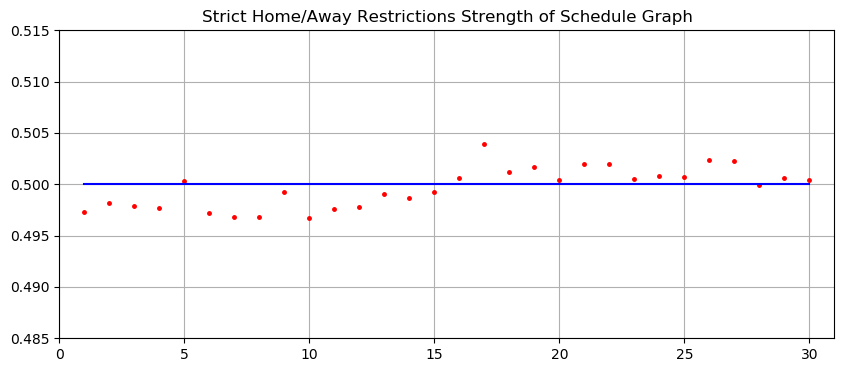

Average strength of RPI/strength of schedule from data: 0.49966666666666676


In [50]:
using PyPlot
figure(figsize=(10,4))
x = zeros(30)
y = zeros(30)
for i in 1:30
    x[i] = i
    y[i] = 0.5
end
plot(x,strength,"r.", markersize=5)
plot(x,y,"b-", markersize=5)
title("Strict Home/Away Restrictions Strength of Schedule Graph")
axis([0,31,0.485,0.515])
grid("True")

println("AL average RPI from data: ",sum(rpi[i] for i in 1:15)/15)
println("Average AL strength of schedule: ", sum(strength[i] for i in 1:15)/15)
println("NL average RPI from data: ",sum(rpi[i] for i in 16:30)/15)
println("Average NL strength of schedule: ", sum(strength[i] for i in 16:30)/15)
println("Average strength of RPI/strength of schedule from data: ",sum(rpi[i] for i in 1:30)/30)

AL average RPI from data: 0.49720000000000003
Average AL strength of schedule: 0.4981144654088051
NL average RPI from data: 0.5021333333333333
Average NL strength of schedule: 0.5012188679245283


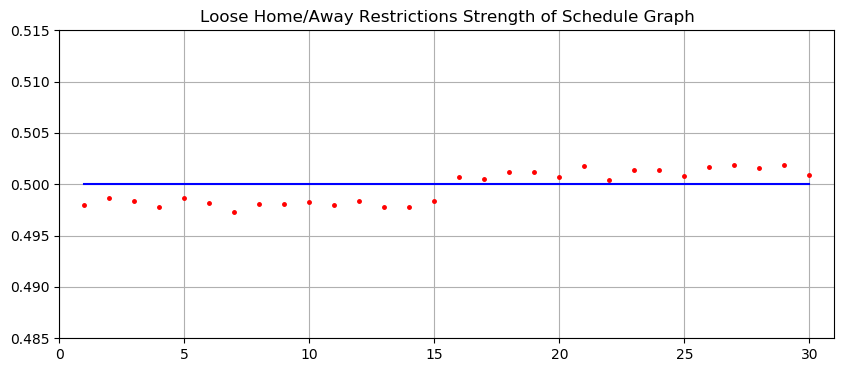

Average strength of RPI/strength of schedule from data: 0.49966666666666676


In [55]:
using PyPlot
figure(figsize=(10,4))
x = zeros(30)
for i in 1:30
    x[i] = i
end
plot(x,strength2,"r.", markersize=5)
plot(x,y,"b-", markersize=5)
title("Loose Home/Away Restrictions Strength of Schedule Graph")
axis([0,31,0.485,0.515])
grid("True")

println("AL average RPI from data: ",sum(rpi[i] for i in 1:15)/15)
println("Average AL strength of schedule: ", sum(strength2[i] for i in 1:15)/15)
println("NL average RPI from data: ",sum(rpi[i] for i in 16:30)/15)
println("Average NL strength of schedule: ", sum(strength2[i] for i in 16:30)/15)
println("Average strength of RPI/strength of schedule from data: ",sum(rpi[i] for i in 1:30)/30)

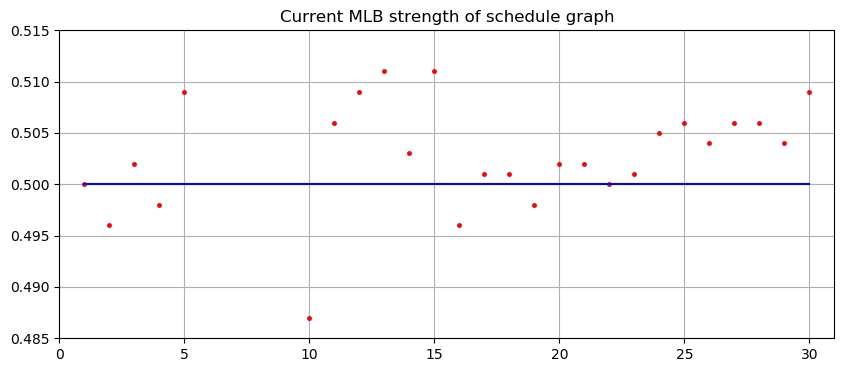

In [52]:
using PyPlot
figure(figsize=(10,4))
x = zeros(30)
for i in 1:30
    x[i] = i
end
strength3 =
  [ .5,.496,.502,.498,.509,.483,.479,.483,.484,.487,.506,.509,.511,.503,.511,.496,
    .501, .501, .498, .502, .502,.5,.501,.505,.506, .504, .506, .506, .504, .509 ]

plot(x,strength3,"r.", markersize=5)
plot(x,y,"b-", markersize=5)
title("Current MLB strength of schedule graph")
axis([0,31,0.485,0.515])
grid("True")

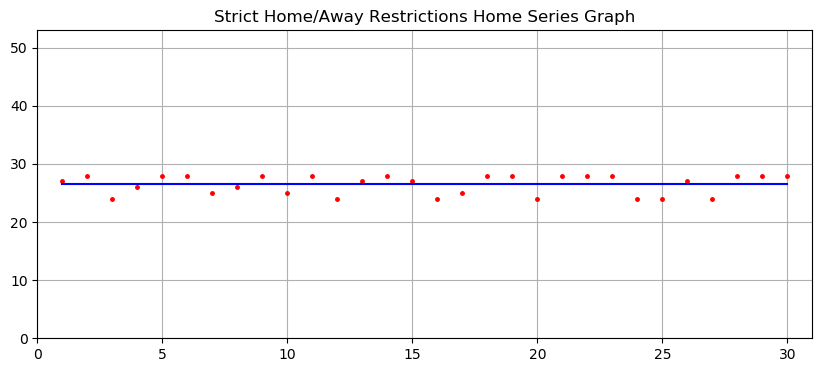

In [53]:
using PyPlot
figure(figsize=(10,4))
x = zeros(30)
y2 = zeros(30)
for i in 1:30
    x[i] = i
    y2[i] = 26.5
end
plot(x,h1,"r.", markersize=5)
plot(x,y2,"b-", markersize=5)
title("Strict Home/Away Restrictions Home Series Graph")
axis([0,31,0,53])
grid("True")

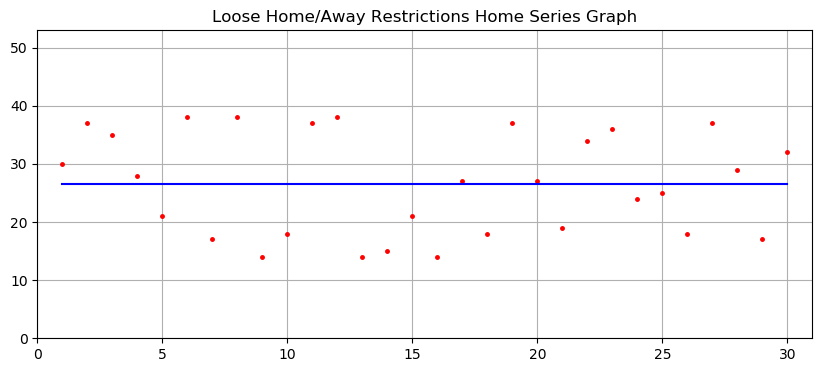

In [54]:
using PyPlot
figure(figsize=(10,4))
x = zeros(30)
for i in 1:30
    x[i] = i
end
plot(x,h2,"r.", markersize=5)
plot(x,y2,"b-", markersize=5)
title("Loose Home/Away Restrictions Home Series Graph")
axis([0,31,0,53])
grid("True")

## 5. Conclusion ##

Through this project we were able to identify the amount of series played between teams in Major League Baseball for one season as well as the amount that were played home vs away. We found that creating an optimal schedule with an even distribution of series amongst teams is infeasible. Although this is infeasible, we can do a good job creating even strength of schedules for each team across the mlb, with very little variation within either conference.

A possible future direction is to incorporate priorities for highly anticipated games. For instance, some teams have historic rivalries that are important to include each season. Even though they share the same city, Chicago’s White Sox and Cubs are not even in the same conference. The Cubs are in the NL, while the White Sox are in the AL. Additionally, they do not share the same fan base. In fact, the rivalry between these teams is deeply rooted in their fans as well. Therefore, the week that these two teams play each other, called the Chicago Crosstown Classic, is very important to the city of Chicago and its residents. 

Another future direction is adding a constraint for distance travelled. Major League Baseball has a travel capacity of 50,000 miles per season (which can be surpassed in extraneous circumstances) [3]. The distance of travel has the potential of impacting a team’s performance and the miles travelled are not evenly distributed throughout the league. For example, in the 2016 season the Chicago Cubs travelled the least with 24,271 miles while the Seattle Mariners travelled the most with 47,704 miles [3]. This large difference could be in part to the locations of these cities in respect to the other cities in the league since Chicago is more centrally located than Seattle, however, it shows how there are tradeoffs in the current scheduling process that allows for such a difference.


## 6. References ##
[1]	“2018 MLB Baseball Relative Power Index - Major League Baseball - ESPN,” ESPN.com. [Online]. Available: http://www.espn.com/mlb/stats/rpi/_/year/2018. [Accessed: 06-May-2019].

[2]	“Major League Baseball schedule,” Wikipedia. 01-Apr-2019.

[3]	“Mariners have toughest travel schedule in MLB,” MLB.com. [Online]. Available: https://www.mlb.com/news/mariners-have-toughest-travel-schedule-in-mlb/c-168865688. [Accessed: 06-May-2019].